## Task
Compare Linear Regression with Ordinary Least Squares (OLS), Ridge Regression, LASSO & Elastic Net on a sample data set

## Notebook Summary
* [Create sample data set](#create_dataset)
* [Split data into training & test sets](#split_data)
* [Fit models](#fit_models) - OLS, Ridge (CV), LASSO (CV), ElasticNet (CV)
* [Examine model intercept and coefficients](#intercept_coef)
* [Examine SSE & R^2](#sse_r2)
* Diagnostic plots
 * [Residuals vs. Fitted values](#resid_fitted_plot)
 * [QQ plot of residuals](#qqplot_resid) (against theoretical quantiles of $N(0,1)$)


## References
* [scikit-learn Generalized Linear Models](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* Numerical Python, Robert Johansson, APress, 2015 (Chap 14 & 15)


In [36]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import platform
print 'python.version = ', platform.python_version()
import IPython
print 'ipython.version =', IPython.version_info

import numpy as np
print 'numpy.version = ', np.__version__
import pandas as pd
print 'pandas.version = ', pd.__version__

import sklearn
print 'sklearn.version = ', sklearn.__version__
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection

import statsmodels.api as sm # for QQ plot
print 'statsmodels.version =', sm.version.version

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
print 'matplotlib.version = ', matplotlib.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__


python.version =  2.7.10
ipython.version = (5, 1, 0, '')
numpy.version =  1.11.2
pandas.version =  0.19.1
sklearn.version =  0.18
statsmodels.version = 0.6.1
matplotlib.version =  1.5.3
seaborn.version =  0.7.1


<a id='create_dataset' />
### Create sample data set

In [37]:
# make regression data set - not all features are informative

X, Y, coef = datasets.make_regression(
            n_samples = 1000,
            n_features = 50,
            n_informative = 20,
            n_targets = 1,
            noise = 1.0,
            coef=True
        )

print 'X:', type(X), X.shape
print 'Y:', type(Y), Y.shape
print 'coef:', type(coef), coef.shape
print 'coef: # non-zero features = ', np.count_nonzero(coef)


X: <type 'numpy.ndarray'> (1000, 50)
Y: <type 'numpy.ndarray'> (1000,)
coef: <type 'numpy.ndarray'> (50,)
coef: # non-zero features =  20


<a id='split_data' />
### Split data into training and test sets

In [38]:
# Split into training and test set

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.33)
print 'X_train:', type(X_train), X_train.shape
print 'X_test:', type(X_test), X_test.shape
print 'Y_train:', type(Y_train), Y_train.shape
print 'X_test:', type(Y_test), Y_test.shape


X_train: <type 'numpy.ndarray'> (670, 50)
X_test: <type 'numpy.ndarray'> (330, 50)
Y_train: <type 'numpy.ndarray'> (670,)
X_test: <type 'numpy.ndarray'> (330,)


<a id='fit_models' />
### Fit models

In [39]:
# Fit various models to training data

# OLS - no regularization
m_ols = linear_model.LinearRegression(fit_intercept=True, copy_X=True)
m_ols.fit(X_train, Y_train)

# Ridge Regression
# OLS with L2 regularization
# alpha - controls amt of shrinkage
# large alpha => more shrinkage and more robustness to collinearity
# m_ridge = linear_model.Ridge(alpha=1.0, fit_intercept=True, copy_X=True)
# m_ridge.fit(X_train, Y_train)

m_ridge = linear_model.RidgeCV(alphas=np.arange(0.001, 1, 0.0001))
m_ridge.fit(X_train, Y_train)
print 'alpha from Ridge CV =', m_ridge.alpha_

# LASSO
# OLS with L1 regularization
# Minimizes number of non-zero coefficients
# m_lasso = linear_model.Lasso(alpha=1.0, fit_intercept=True, copy_X=True)
# m_lasso.fit(X_train, Y_train)

# LASSO CV
m_lasso = linear_model.LassoCV()
m_lasso.fit(X_train, Y_train)
print 'alpha from LASSO CV =', m_lasso.alpha_


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

RidgeCV(alphas=array([ 0.001 ,  0.0011, ...,  0.9998,  0.9999]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

alpha from Ridge CV = 0.001


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

alpha from LASSO CV = 0.0972956217566


<a id='intercept_coef' />
### Intercept, Coefficients

Intercepts:
OLS = -0.0134342112743
Ridge = -0.0134175959552
LASSO = 0.0109934536814


Number of almost-non-zero features (> 0.1):
LASSO    20
OLS      20
Ridge    20
dtype: int64


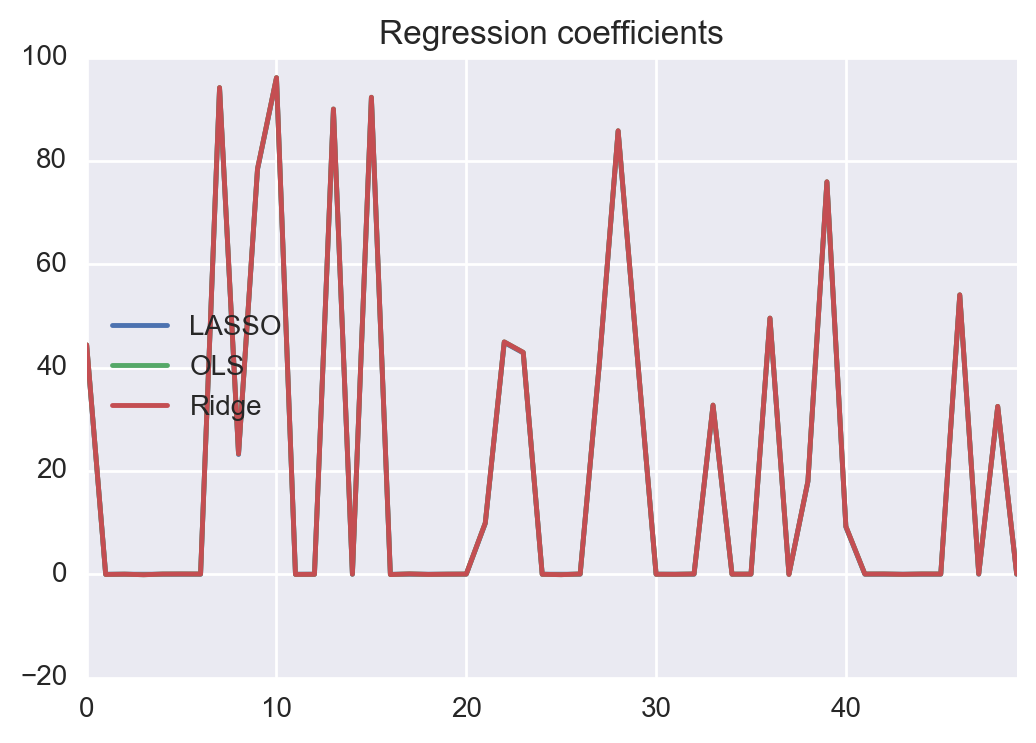

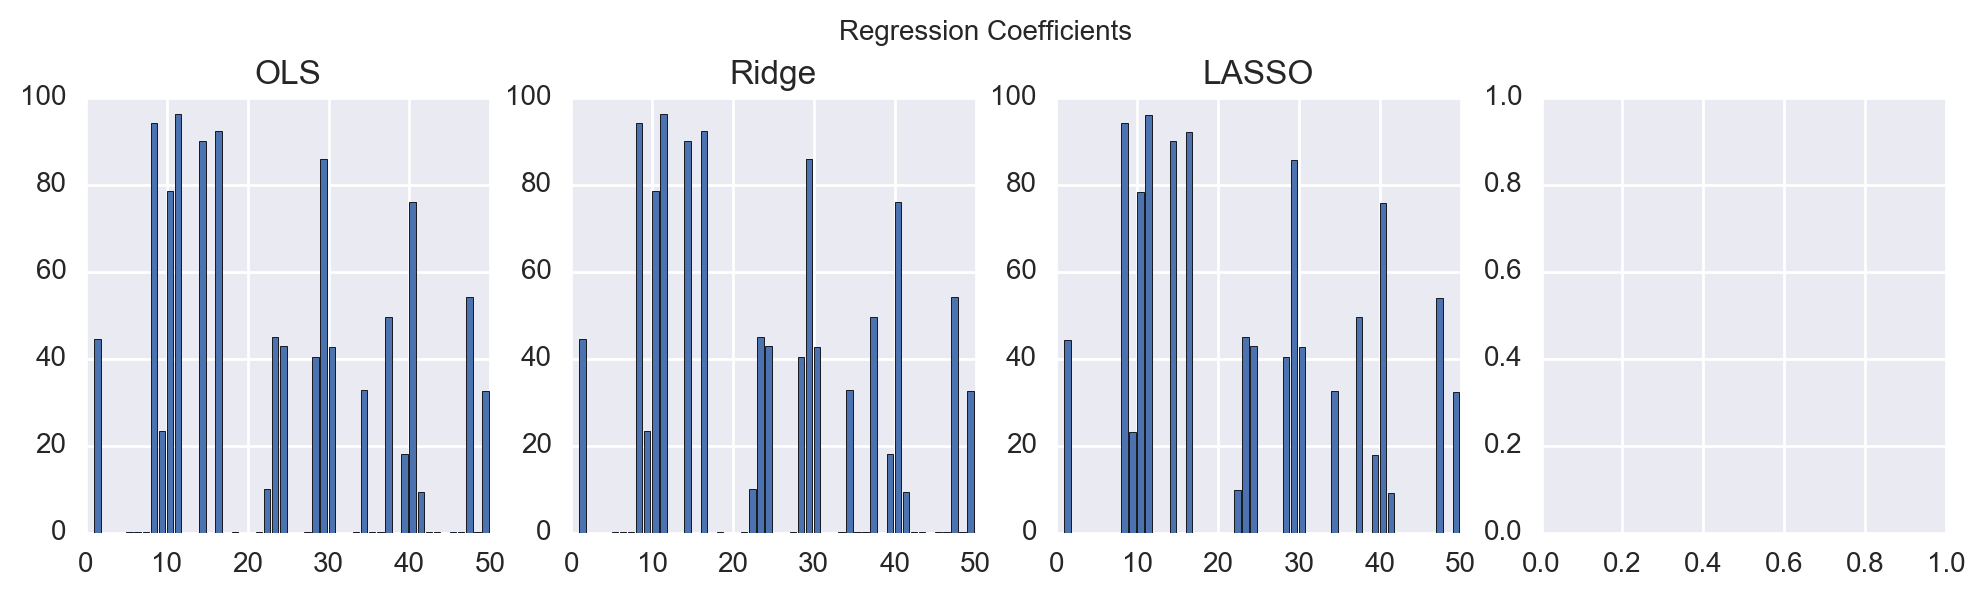

In [45]:
print "Intercepts:"
print 'OLS =', m_ols.intercept_
print 'Ridge =', m_ridge.intercept_
print 'LASSO =', m_lasso.intercept_
# print 'Elastic Net =', m_elasticnet.intercept_
print '\n'

df = pd.DataFrame({
        'OLS': m_ols.coef_,
        'Ridge': m_ridge.coef_,
        'LASSO': m_lasso.coef_
    })

print 'Number of almost-non-zero features (> 0.1):'
print df[(df>0.1)].count()

# plot coef as line plots
df.plot(title='Regression coefficients');

# plot coef as separate bar plots
def plot_coef(ax, m, title):
    ax.bar(range(1, len(m.coef_)+1), m.coef_); 
    ax.set_xlim(0,50);
    ax.set_ylim(0,100);
    ax.set_title(title);

# plot coef
fig, axes = plt.subplots(1,4, figsize=(12,3));
plot_coef(axes[0], m_ols, 'OLS')
plot_coef(axes[1], m_ridge, 'Ridge')
plot_coef(axes[2], m_lasso, 'LASSO')
# plot_coef(axes[3], m_elasticnet, 'Elastic Net')
fig.subplots_adjust(top=0.85);
fig.suptitle('Regression Coefficients');


<a id='sse_r2' />
### Sum of Squared Errors, $R^2$

In [41]:
# SSE - training set
def sse(m, X, Y):
    return sum((Y - m.predict(X))**2)

print 'SSE - training:'
print 'OLS =', sse(m_ols, X_train, Y_train)
print 'Ridge =', sse(m_ridge, X_train, Y_train)
print 'LASSO =', sse(m_lasso, X_train, Y_train)
print '\n'

# R^2 - training set
print 'R2 - training:'
print 'OLS =', m_ols.score(X_train, Y_train)
print 'Ridge =', m_ridge.score(X_train, Y_train)
print 'LASSO =', m_lasso.score(X_train, Y_train)
# print 'Elastic Net =', m_elasticnet.score(X_train, Y_train)


SSE - training:
OLS = 599.60890227
Ridge = 599.609026709
LASSO = 772.162543201


R2 - training:
OLS = 0.999987117917
Ridge = 0.999987117915
LASSO = 0.999983410751


In [42]:
# SSE - test set
print 'SSE - test:'
print 'OLS =', sse(m_ols, X_test, Y_test)
print 'Ridge =', sse(m_ridge, X_test, Y_test)
print 'LASSO =', sse(m_lasso, X_test, Y_test)
# print 'Elastic Net =', sse(m_elasticnet, X_test, Y_test)
print '\n'

# R^2 - test set
print 'R2 - test:'
print 'OLS =', m_ols.score(X_test, Y_test)
print 'Ridge =', m_ridge.score(X_test, Y_test)
print 'LASSO =', m_lasso.score(X_test, Y_test)
# print 'Elastic Net =', m_elasticnet.score(X_test, Y_test)


SSE - test:
OLS = 350.42169823
Ridge = 350.436133553
LASSO = 436.06294323


R2 - test:
OLS = 0.999984380533
Ridge = 0.999984379889
LASSO = 0.999980563216


<a id='resid_fitted_plot' />
### Diagnostic plot: Residuals vs. Fitted values

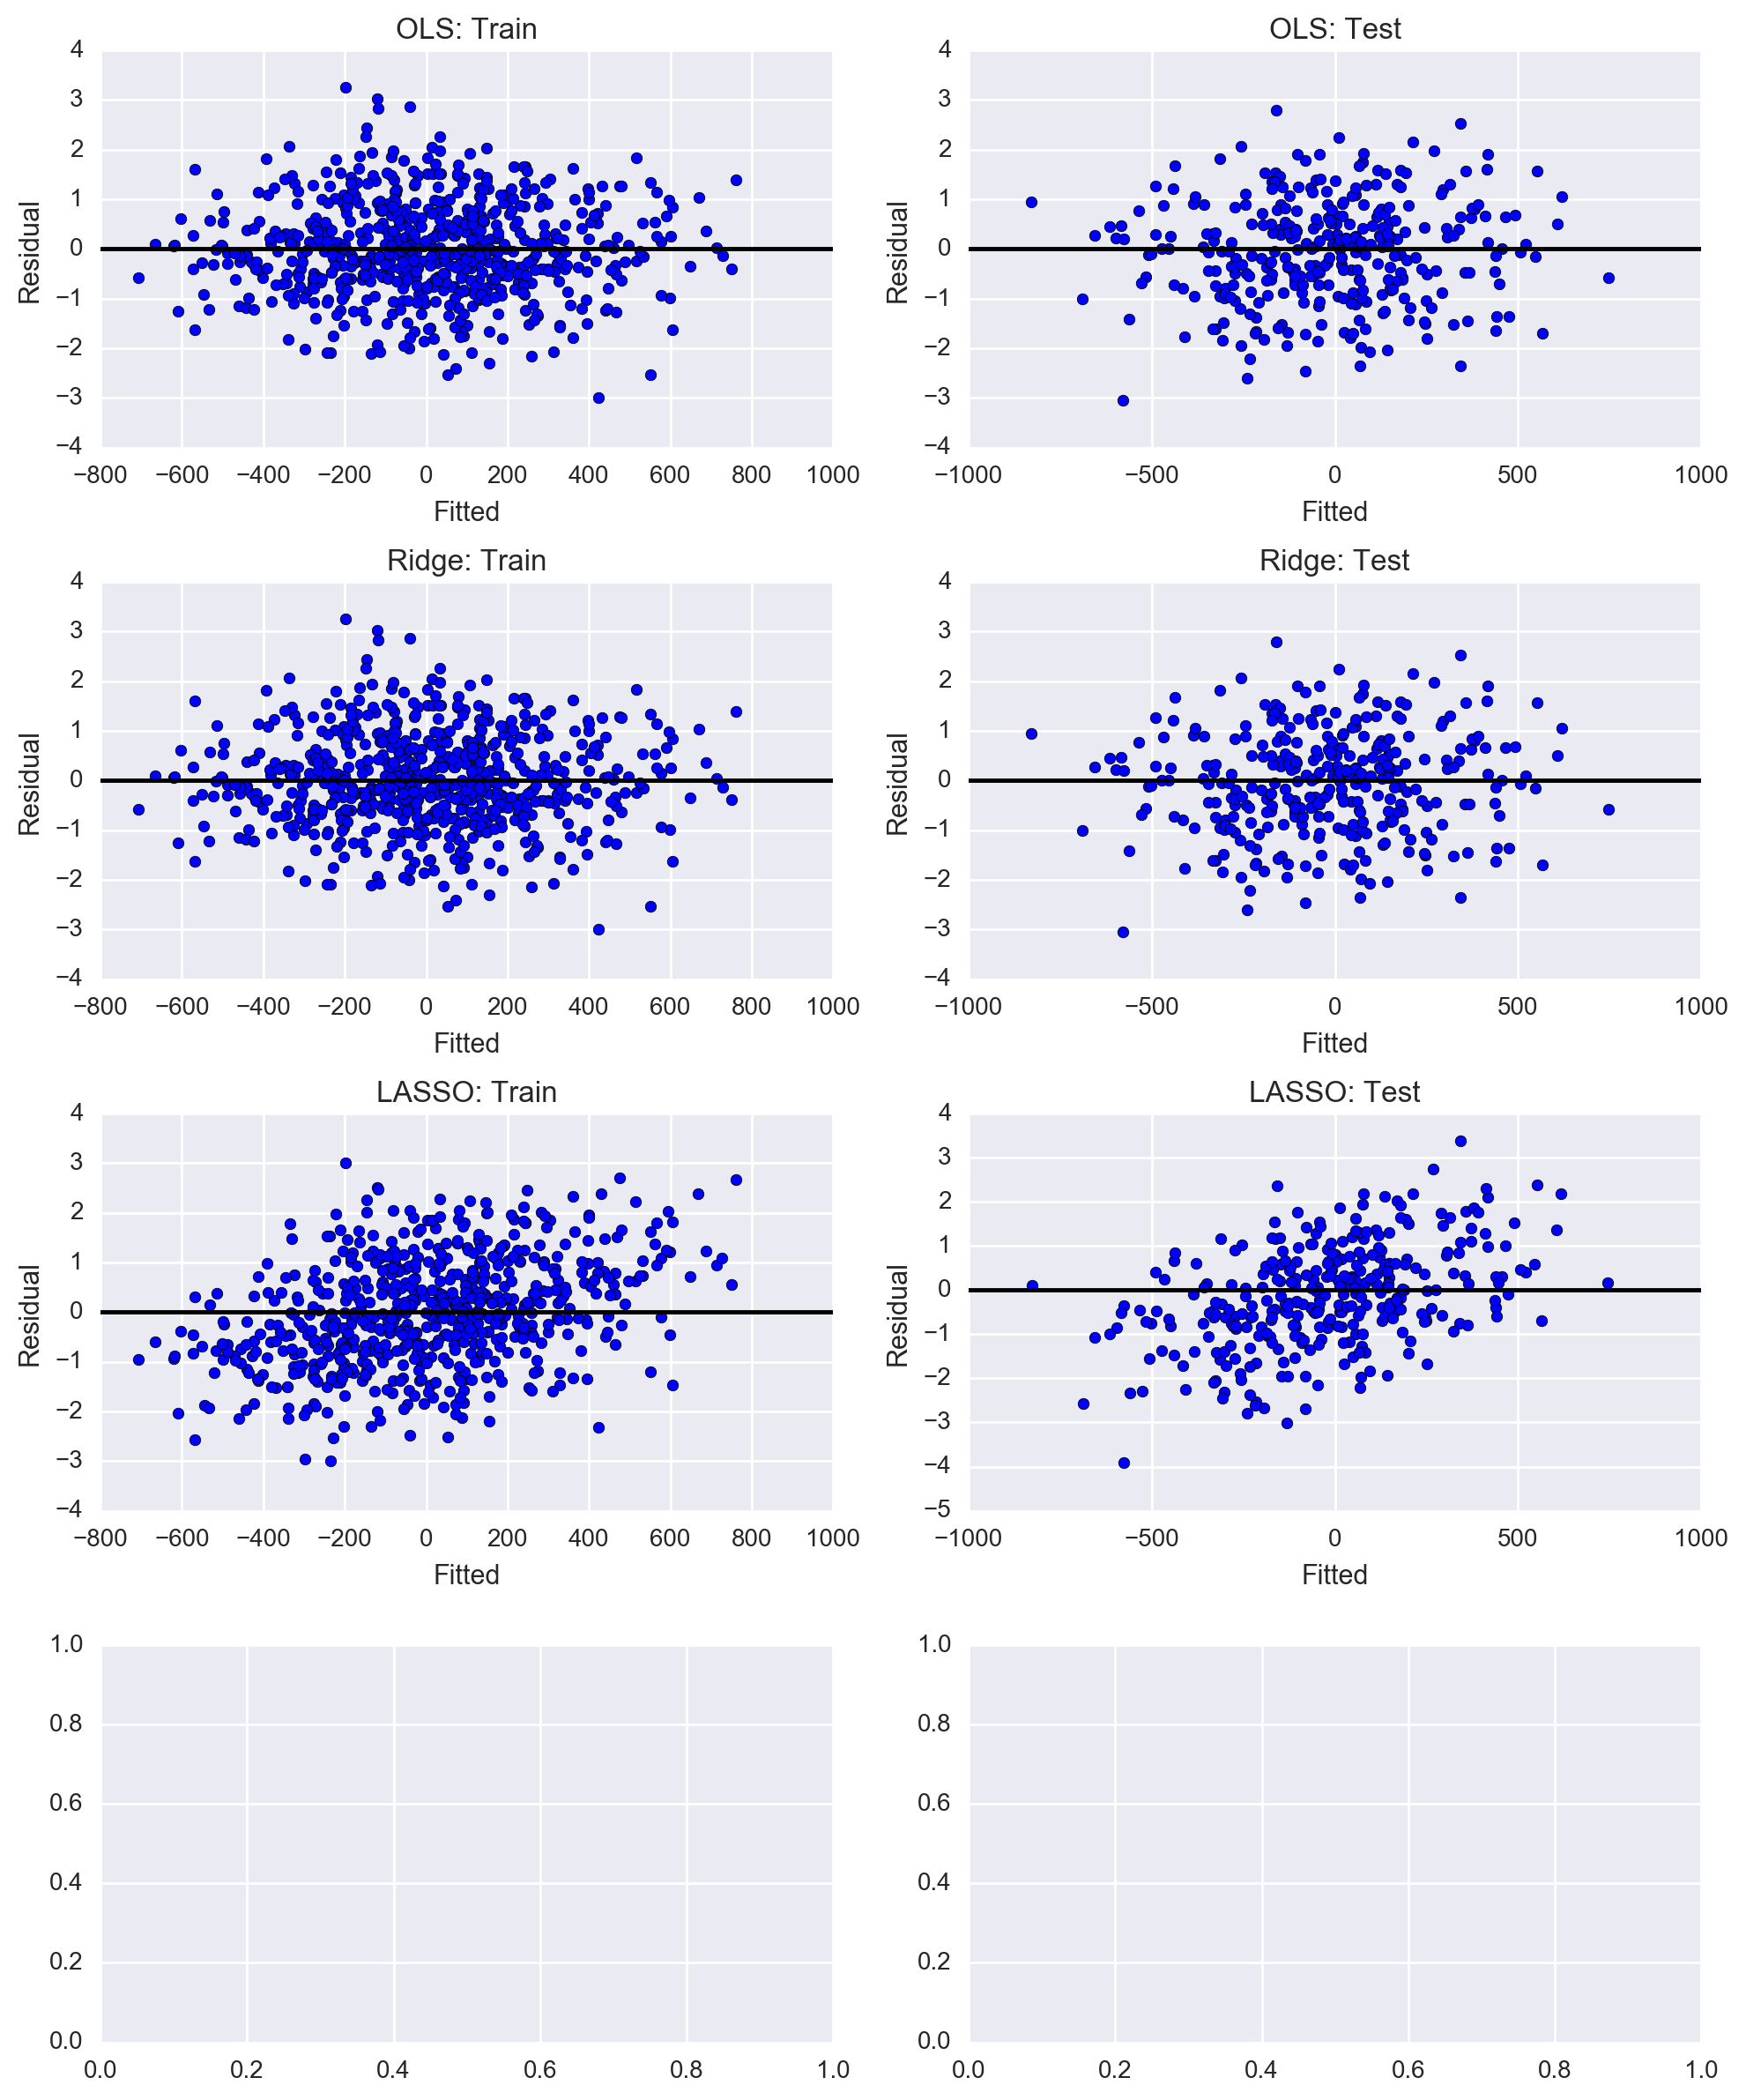

In [46]:
# Diagnostic plot - residuals vs. fitted values
def plot_resid_fitted(ax, m, title, X, Y):
    ax.scatter(m.predict(X), Y-m.predict(X))
    ax.set_xlabel('Fitted')
    ax.set_ylabel('Residual')
    ax.set_title(title)
    ax.axhline(c='black')

fig, axes = plt.subplots(4,2, figsize=(10,12))
plot_resid_fitted(axes[0,0], m_ols, 'OLS: Train', X_train, Y_train)
plot_resid_fitted(axes[0,1], m_ols, 'OLS: Test', X_test, Y_test)

plot_resid_fitted(axes[1,0], m_ridge, 'Ridge: Train', X_train, Y_train)
plot_resid_fitted(axes[1,1], m_ridge, 'Ridge: Test', X_test, Y_test)

plot_resid_fitted(axes[2,0], m_lasso, 'LASSO: Train', X_train, Y_train)
plot_resid_fitted(axes[2,1], m_lasso, 'LASSO: Test', X_test, Y_test)

# plot_resid_fitted(axes[3,0], m_elasticnet, 'ElasticNet: Train', X_train, Y_train)
# plot_resid_fitted(axes[3,1], m_elasticnet, 'ElasticNet: Test', X_test, Y_test)

fig.tight_layout();


<a id='qqplot_resid' />
### QQ-plot of residuals

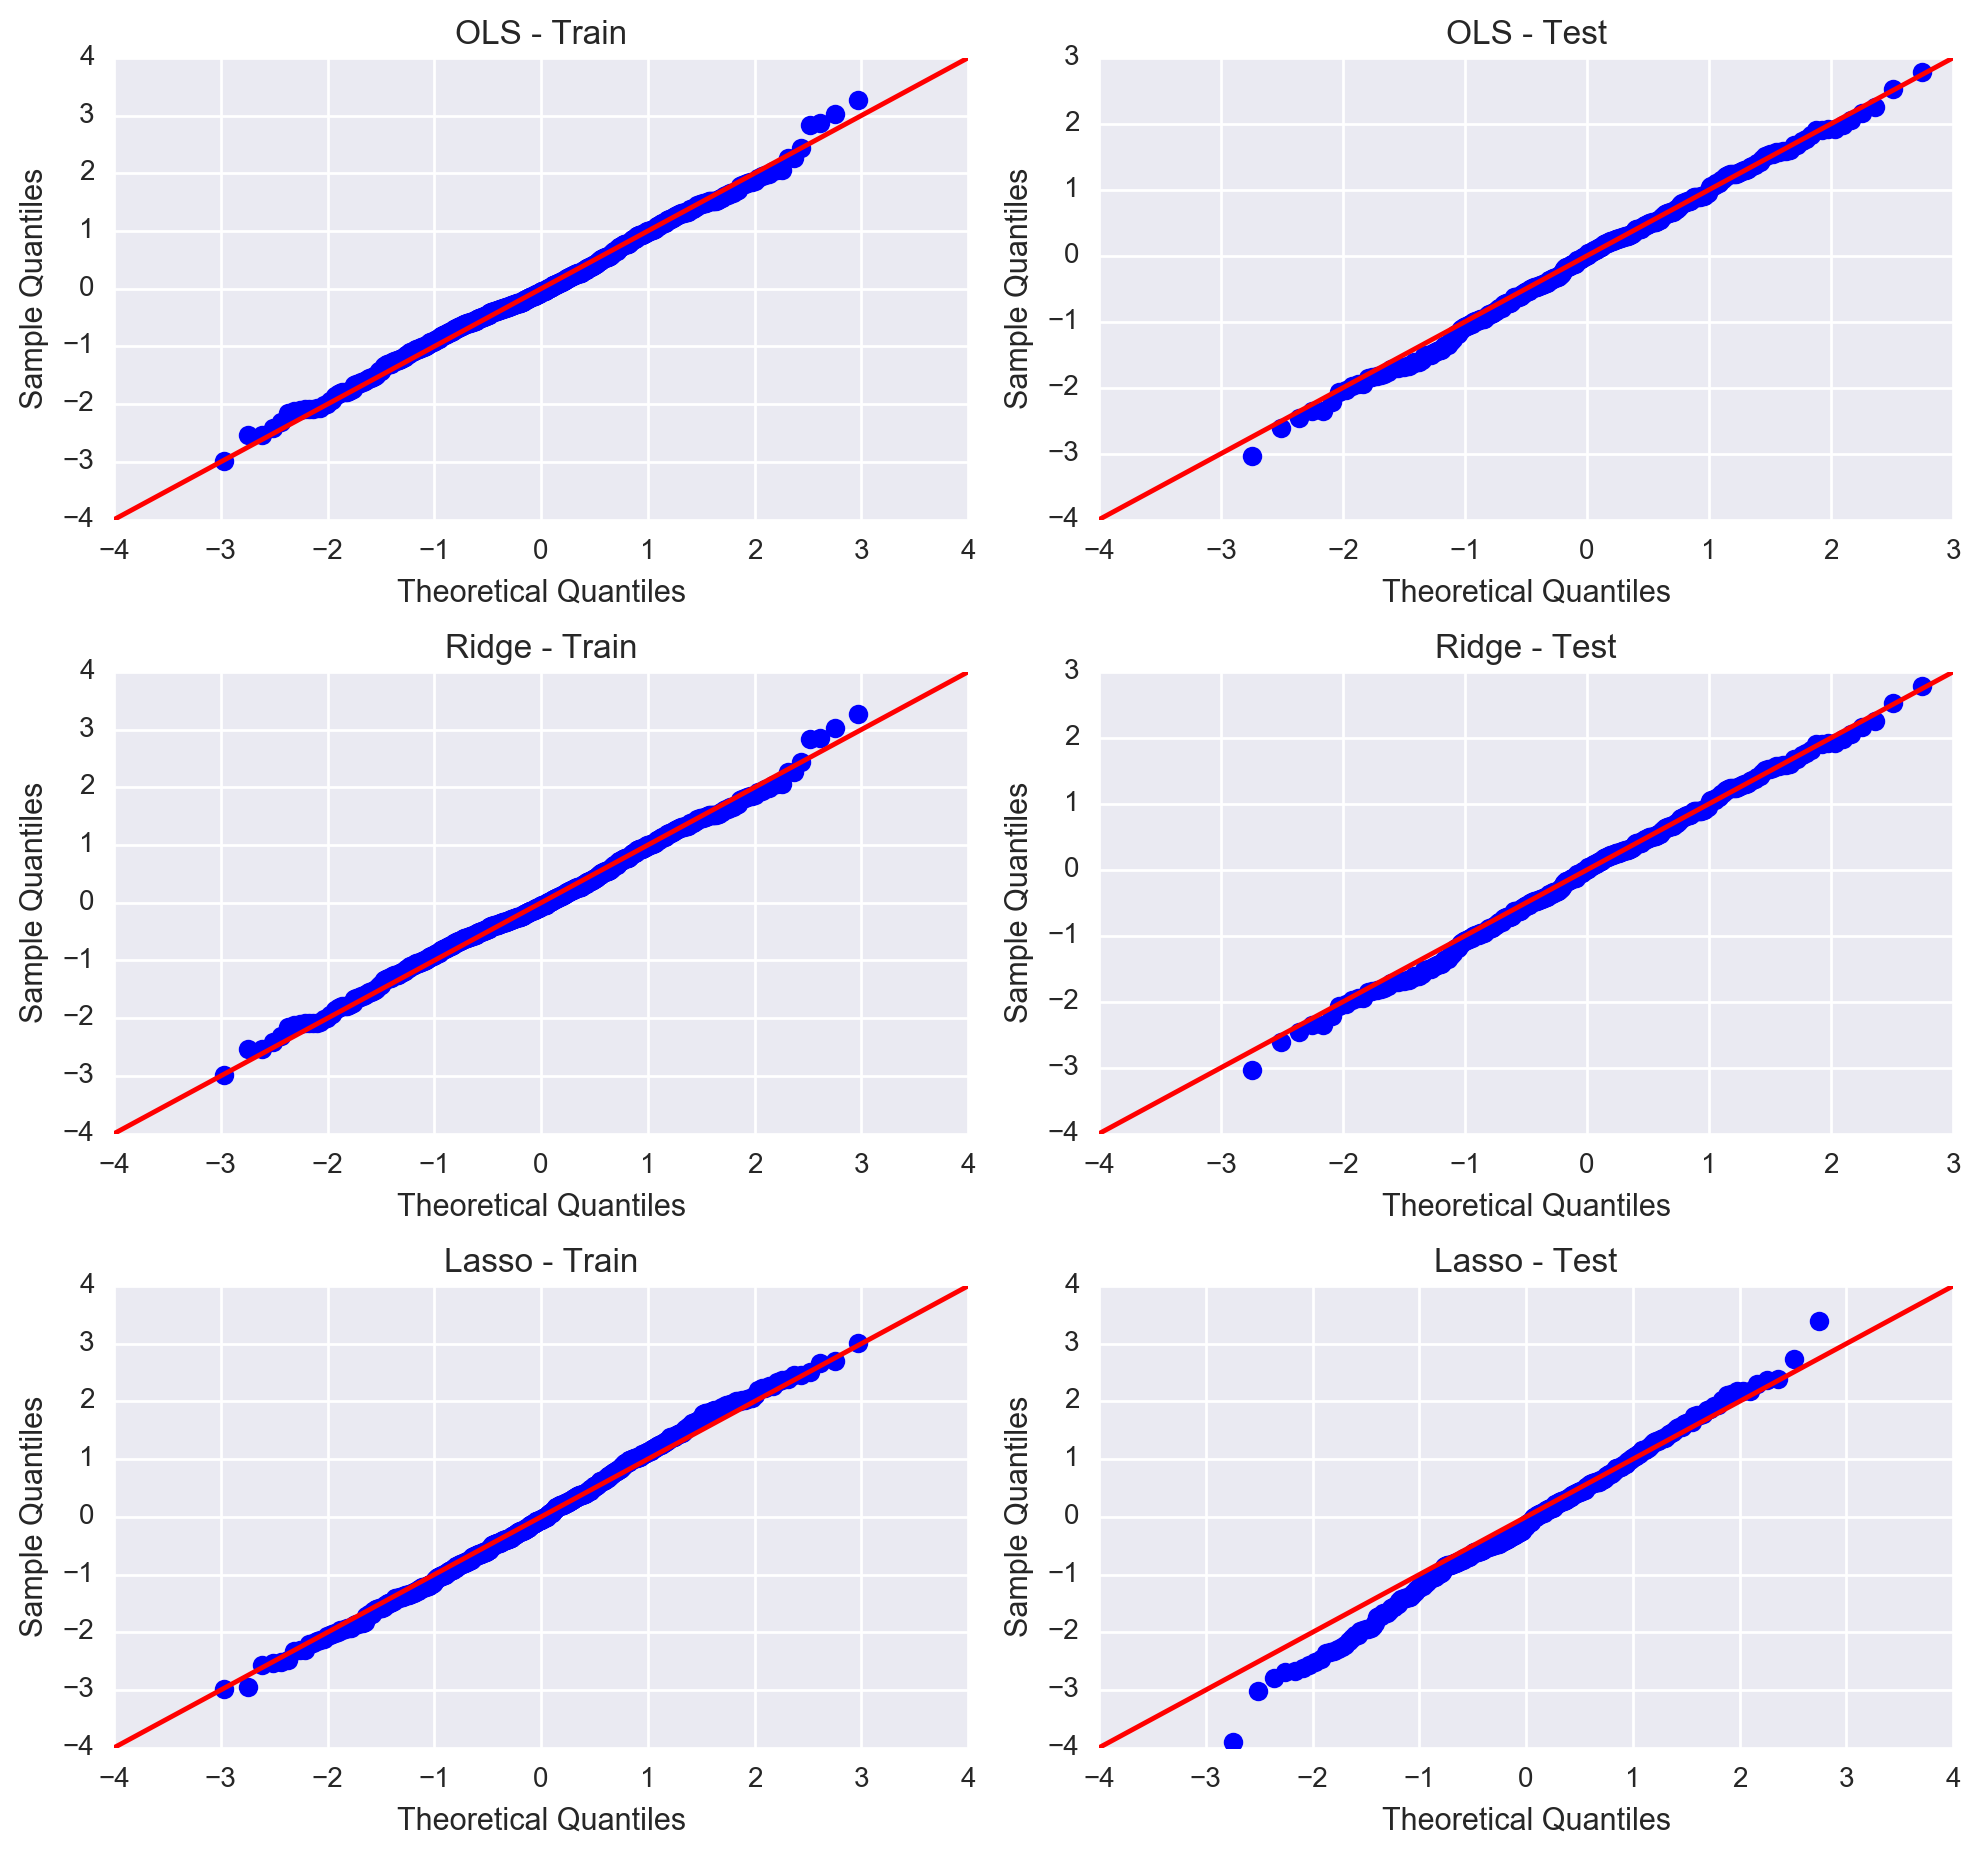

In [44]:
# Diagnostic plot - QQ plot of residuals (against quantiles of N(0,1))

fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(4,2,1);
fig = sm.qqplot(Y_train-m_ols.predict(X_train), line='45', ax=ax);
plt.title('OLS - Train');

ax = fig.add_subplot(4,2,2);
fig = sm.qqplot(Y_test-m_ols.predict(X_test), line='45', ax=ax);
plt.title('OLS - Test');

ax = fig.add_subplot(4,2,3);
fig = sm.qqplot(Y_train-m_ridge.predict(X_train), line='45', ax=ax);
plt.title('Ridge - Train');

ax = fig.add_subplot(4,2,4);
fig = sm.qqplot(Y_test-m_ridge.predict(X_test), line='45', ax=ax);
plt.title('Ridge - Test');

ax = fig.add_subplot(4,2,5);
fig = sm.qqplot(Y_train-m_lasso.predict(X_train), line='45', ax=ax);
plt.title('Lasso - Train');

ax = fig.add_subplot(4,2,6);
fig = sm.qqplot(Y_test-m_lasso.predict(X_test), line='45', ax=ax);
plt.title('Lasso - Test');

fig.tight_layout()
